In [1]:
import  matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
baby = pd.read_csv('baby.csv')

In [3]:
baby.head()

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False


In [6]:
baby.drop('Unnamed: 0',axis = 'columns', inplace= True)

In [7]:
baby.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [8]:
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [9]:
smoking_and_birthweight['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [10]:
smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == True]
smoker

2       128
3       108
8       143
10      144
11      141
       ... 
1162    143
1163    113
1164    109
1165    103
1171    130
Name: Birth Weight, Length: 459, dtype: int64

In [11]:
non_smoker = smoking_and_birthweight['Birth Weight'] [smoking_and_birthweight['Maternal Smoker'] == False]
non_smoker

0       120
1       113
4       136
5       138
6       132
       ... 
1168    132
1169    113
1170    128
1172    125
1173    117
Name: Birth Weight, Length: 715, dtype: int64

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

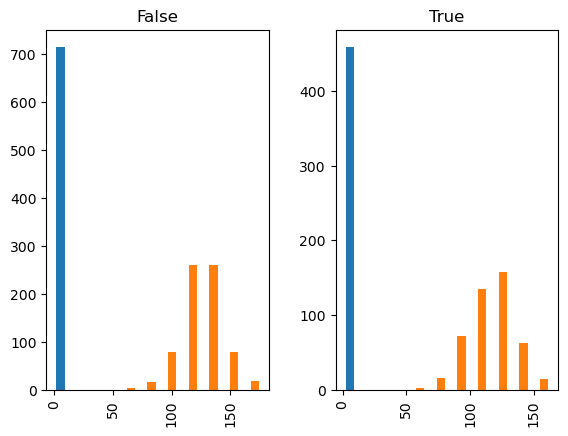

In [14]:
smoking_and_birthweight.hist(by ='Maternal Smoker')
plt.show()

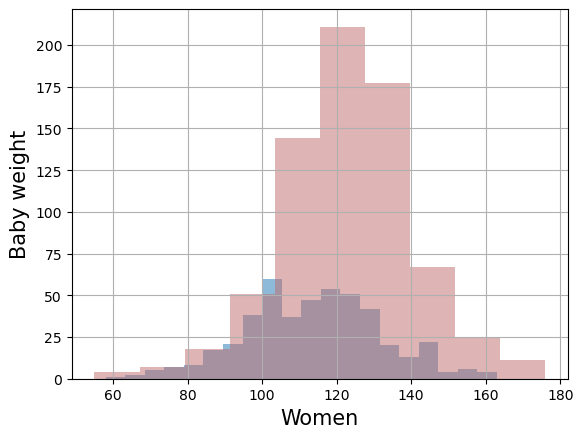

In [15]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Baby weight',fontsize=15)
plt.show()

# Test Statistic

In [16]:
means_table = smoking_and_birthweight.groupby('Maternal Smoker').mean()
type(means_table)

pandas.core.frame.DataFrame

In [17]:
means_table

,Birth Weight
Maternal Smoker,
False,123.085315
True,113.819172


In [18]:
observed_difference = means_table['Birth Weight'][1] - means_table['Birth Weight'][0]

# Predicting the Statistic Under the Null Hypothesis

In [19]:
smoking_and_birthweight

,Maternal Smoker,Birth Weight
0,False,120
1,False,113
2,True,128
3,True,108
4,False,136
...,...,...
1169,False,113
1170,False,128
1171,True,130
1172,False,125


In [20]:
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled

,Maternal Smoker,Birth Weight
499,False,123
628,True,119
500,False,147
1115,False,115
391,False,115
...,...,...
1047,True,100
744,True,96
313,True,104
124,True,128


In [21]:
shuffled_weights = shuffled['Birth Weight']
type(shuffled_weights)

pandas.core.series.Series

In [22]:
original_and_shuffled= smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
original_and_shuffled

,Maternal Smoker,Birth Weight,shuffled_weights
0,False,120,123
1,False,113,119
2,True,128,147
3,True,108,115
4,False,136,115
...,...,...,...
1169,False,113,100
1170,False,128,96
1171,True,130,104
1172,False,125,128


In [23]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Birth Weight,shuffled_weights
Maternal Smoker,,
False,123.085315,119.855944
True,113.819172,118.849673


In [24]:
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

1.0062708533296671

In [25]:
smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
shuffled = smoking_and_birthweight.sample(1174,replace = False)
shuffled_weights = shuffled['Birth Weight']
original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

-1.6444718680012755

# Permutation Test

In [26]:
import numpy as np
import array
differences = np.zeros(5000)

In [27]:
for i in np.arange(5000):
    smoking_and_birthweight = baby[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_birthweight.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_birthweight.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

In [28]:
differences

array([ 0.53407377, -0.53910142,  0.29439798, ...,  0.10122644,
       -0.66788244, -1.11146152])

In [29]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.534074
1,-0.539101
2,0.294398
3,0.898953
4,-1.490650
...,...
4995,-0.235035
4996,-0.235035
4997,0.101226
4998,-0.667882


Observed Difference: -9.266142572024918


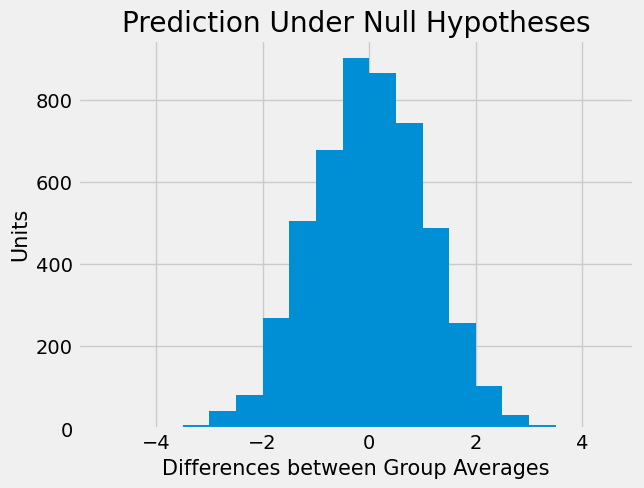

In [31]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_difference)

In [32]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.0